,bfq_hybrid,bfq_polling,kyber_hybrid,kyber_polling,none_hybrid,none_polling,spdk
1,441.0,448.0,746.0,756.0,796.0,934.0,1331.25
2,507.0,402.0,1497.0,1463.0,1648.0,1615.0,1716.46
3,459.0,469.0,1946.0,1926.0,1947.0,1925.0,2001.75
4,504.0,425.0,2062.0,2057.0,2074.0,2086.0,2057.49
5,377.0,449.0,2075.0,2075.0,2061.0,2073.0,2039.52
6,495.0,462.0,2062.0,2063.0,2033.0,2032.0,2049.41
7,460.0,404.0,2051.0,2053.0,2021.0,2020.0,2059.53
8,465.0,521.0,2041.0,2038.0,2011.0,2010.0,2071.71
9,NaN,NaN,NaN,NaN,NaN,NaN,2081.09
10,NaN,NaN,NaN,NaN,NaN,NaN,2092.83


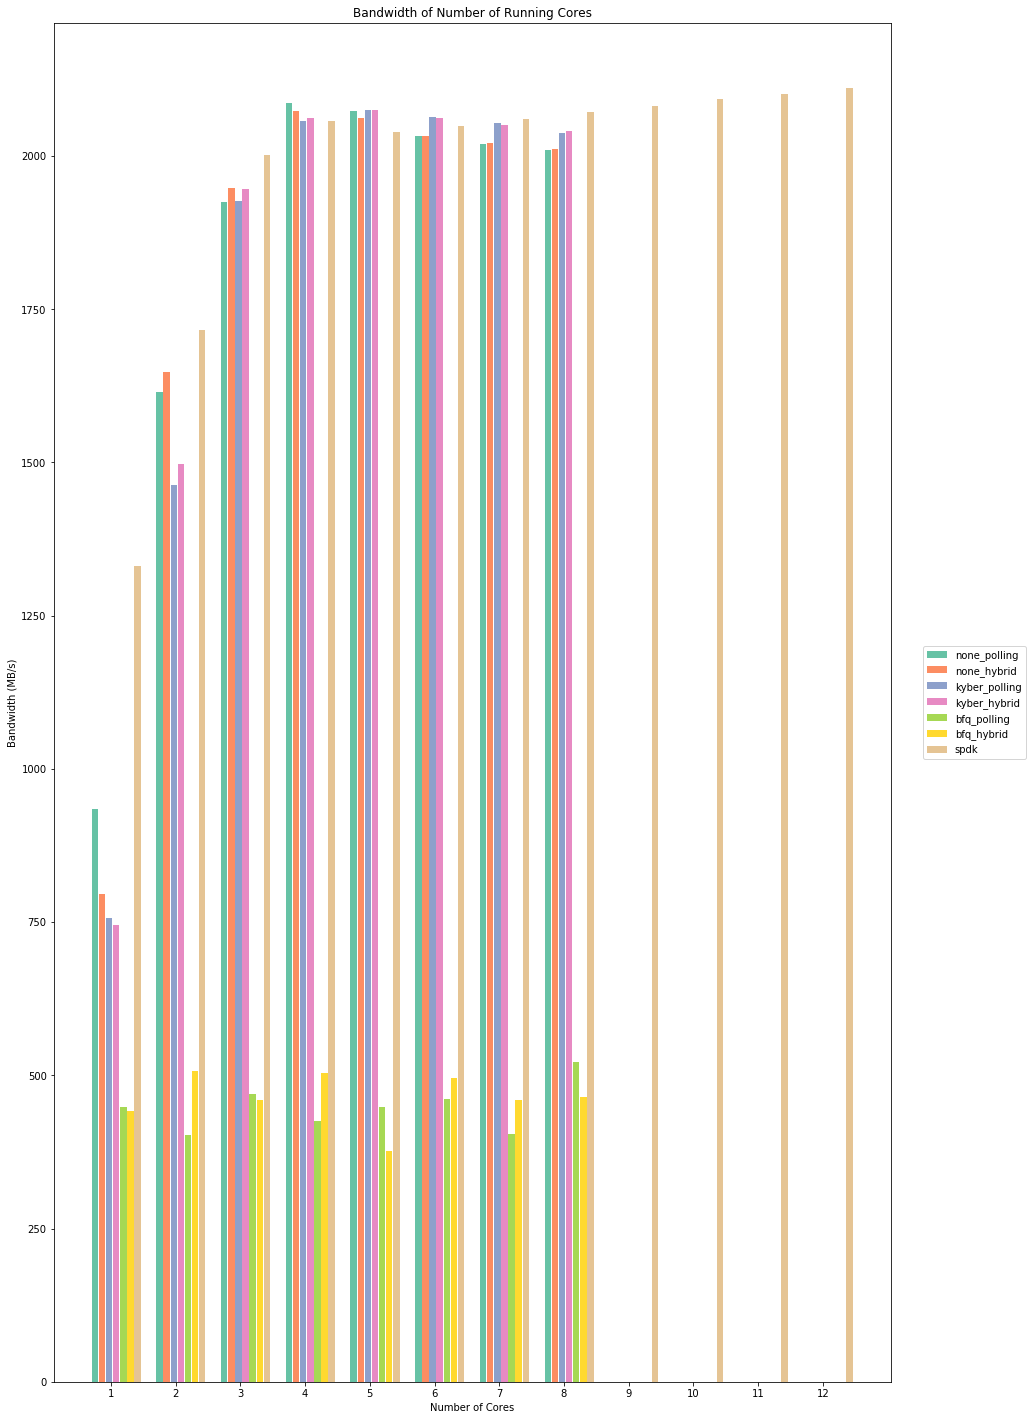

In [224]:
from IPython.display import display

import re
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.cm as cm


pd.set_option('display.max_columns', 20)

BASE_PATH = 'results/'

def gen_fio_logname(elevator, num_jobs, method):
    return BASE_PATH + 'example_config_' + elevator + '_' + str(num_jobs) + 'jbs_' + method + '.log'

def gen_perf_logname(num_cores):
    return BASE_PATH + 'perf_spdk_' + str(num_cores) + 'jbs.log'


read_bw = {}

def extract_fio_bw(elevator, method):
    key = elevator + '_' + method
    read_bw[key] = {}
    
    for num in range(1, 9):
        content = open(gen_fio_logname(elevator, num, method)).read()
        matchObj = re.search(r'bw=.+?\((\d+)', content)
        
        read_bw[key][num] = float(matchObj.group(1))


def extract_perf_bw():
    key = 'spdk'
    read_bw[key] = {}
    
    for num in range(1, 13):
        content = open(gen_perf_logname(num)).read()
        matchObj = re.search(r'Total\s+:\s+[\d\.]+\s+([\d\.]+)', content)
            
        read_bw[key][num] = float(matchObj.group(1))

    
elevators = ['none', 'kyber', 'bfq']
methods = ['polling', 'hybrid']

for e in elevators:
    for m in methods:
        extract_fio_bw(e, m)

extract_perf_bw()

display(pd.DataFrame(read_bw))


# Example plotting https://matplotlib.org/examples/api/barchart_demo.html

values_of_types = [list(t.values()) for t in read_bw.values()]

MAX_NUM_CORES = 12
ind = np.arange(MAX_NUM_CORES)  # the x locations for the groups
width = 0.1       # the width of the bars

MAX_NUM_TYPES = 7
cmap = cm.get_cmap('Set2')

fig, ax = plt.subplots(figsize=(15, 25))

bars = []
for idx, vt in enumerate(values_of_types):
    vv = vt;
    length = len(vv)
    if (length < MAX_NUM_CORES):
        vv.extend([0] * (MAX_NUM_CORES - length))
    bars.append(ax.bar(ind + (width + 0.01) * idx, vv, width, color=cmap(idx / MAX_NUM_TYPES)))
    
    
# add some text for labels, title and axes ticks
ax.set_title('Bandwidth of Number of Running Cores')
ax.set_ylabel('Bandwidth (MB/s)')
ax.set_xlabel('Number of Cores')
ax.set_xticks(ind + width * (len(values_of_types) / 2 - 1))
ax.set_xticklabels(range(1, MAX_NUM_CORES + 1))

ax.legend(bars, read_bw.keys(), loc='center', bbox_to_anchor=(1.1, 0.5))
        
plt.show()